In [1]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [2]:
year = "2014"
nyc_data = "/Users/theodor/Documents/data-proj/NYC-311/311_Service_Requests_from_%s.csv" % year

nyc_columns = ["Created Date", "Complaint Type", "Descriptor", "Location Type", "Borough", "Latitude", "Longitude"]

df = pd.read_csv(nyc_data, usecols=nyc_columns, parse_dates=["Created Date"])

In [3]:
apartments = df.loc[(df['Location Type'] == 'RESIDENTIAL BUILDING'), "Created Date"::]

In [4]:
apartments.head()

,Created Date,Complaint Type,Descriptor,Location Type,Borough,Latitude,Longitude
205,2014-12-31 19:57:47,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,QUEENS,40.754403,-73.792571
1212,2014-12-31 12:23:31,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,MANHATTAN,40.759717,-73.993571
1702,2014-12-31 10:41:48,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,BROOKLYN,40.680489,-73.909191
1908,2014-12-31 09:43:52,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,QUEENS,40.748548,-73.902060
2161,2014-12-31 08:33:46,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,MANHATTAN,40.739870,-73.979431


In [5]:
dt_index = pd.DatetimeIndex(apartments['Created Date'])

apartments['Week'] = dt_index.week
apartments['Weekday'] = dt_index.weekday
apartments['Month'] = dt_index.month
apartments['Hour'] = dt_index.hour

In [6]:
def top_n_column(df, column_sort, n):
    """
    View top n entries from df, sorted by column_sort
    """
    tmp = df.groupby(column_sort)[column_sort].count()
    tmp.sort_values(ascending=False, inplace=True)
    topFactors = tmp.head(n)
    
    df = df[df[column_sort].map(lambda x: x in topFactors)]
    
    return df
    

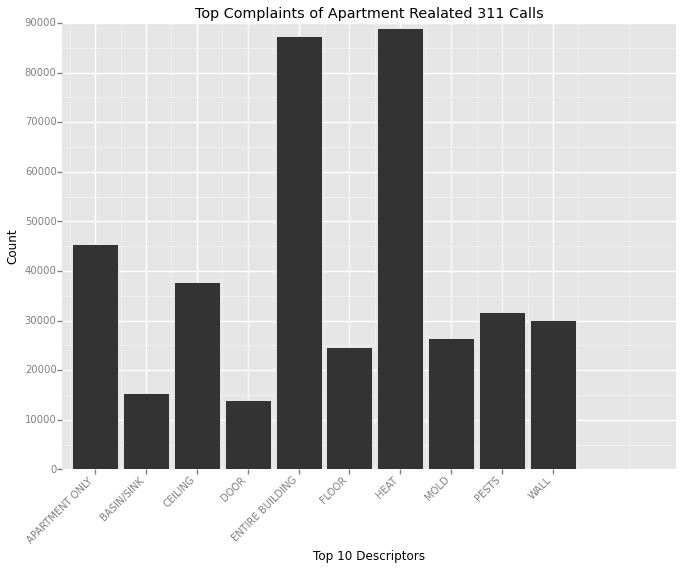

<ggplot: (-9223372036569189176)>


In [7]:
n = 10
column_sort = 'Descriptor'

apartments_top_n = top_n_column(apartments, column_sort, n)
apartments_top_n['Descriptor'].astype('category')


gg = ggplot(aes('Descriptor'), apartments_top_n) + geom_histogram() + \
    theme(axis_text_x  = element_text(angle = 45, hjust = 1)) +\
    labs(title = "Top Complaints of Apartment Realated 311 Calls",
        x = 'Top %i %ss' % (n, column_sort),
        y = 'Count')
print(gg)

In [8]:
top_2 = apartments_top_n.loc[(apartments_top_n.Descriptor == 'HEAT') | (apartments_top_n.Descriptor == 'ENTIRE BUILDING')].dropna()


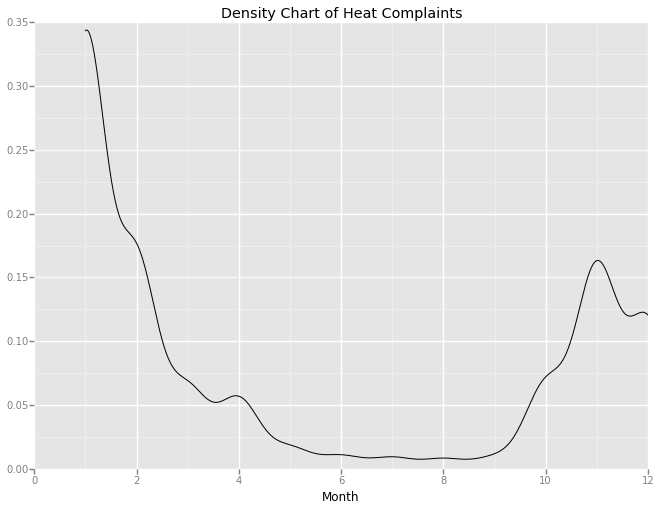

<ggplot: (-9223372036556407657)>

In [9]:
ggplot(aes('Month'), top_2) + geom_density() + labs(title='Density Chart of Heat Complaints')